# Classify using Python Scikit-Learn

In [1]:
from sklearn import datasets
import numpy as np
import sys

sys.path.append('../')

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## split the data set into training set and test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## Standardize the data

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train data using sklearn‘s perceptron

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)

# output => 1
print('Misclassified examples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score

# output => Accuracy: 0.978
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


Misclassified examples: 1
Accuracy: 0.978


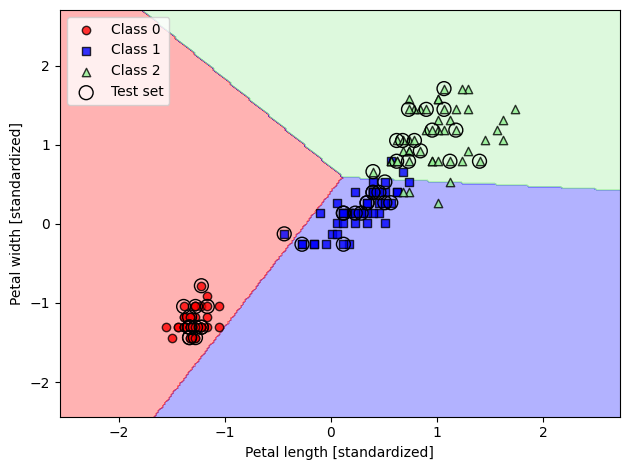

In [6]:
import matplotlib.pyplot as plt
from dlfc.plot import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Hands on LogisticRegression

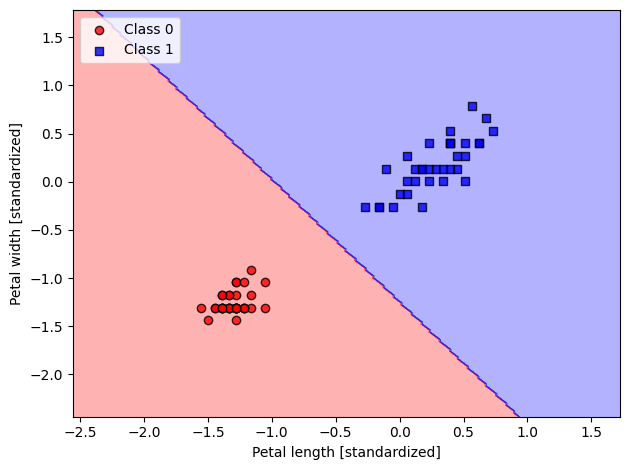

In [7]:
from dlfc.linear import LogisticRegressionGD

X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3,n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Classify using sklearn's LogisticRegression

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


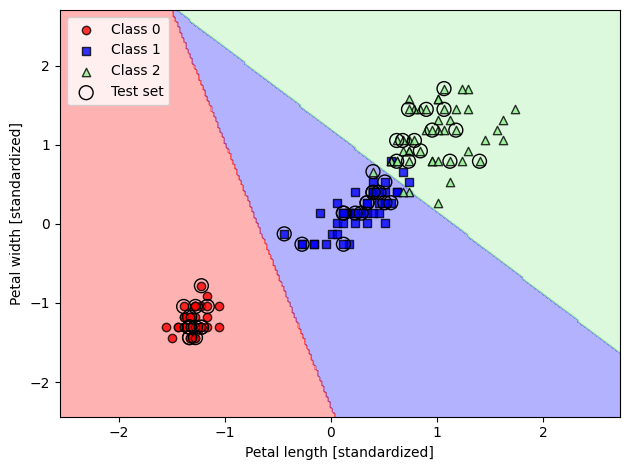

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Hands on LogisticRegression with Softmax

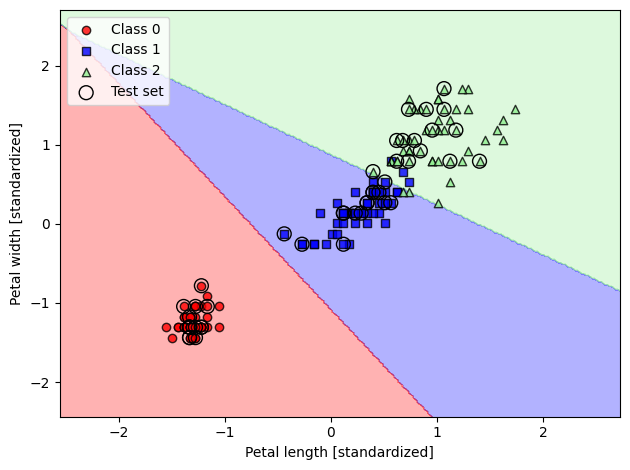

In [9]:
from dlfc.linear import SoftmaxRegressionGD
mlr = SoftmaxRegressionGD(eta=0.1, n_iter=200)
mlr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=mlr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Linear SVM

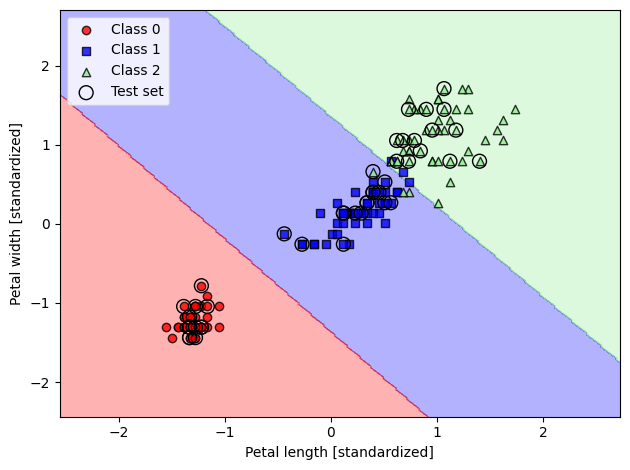

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Linearly inseparable data set

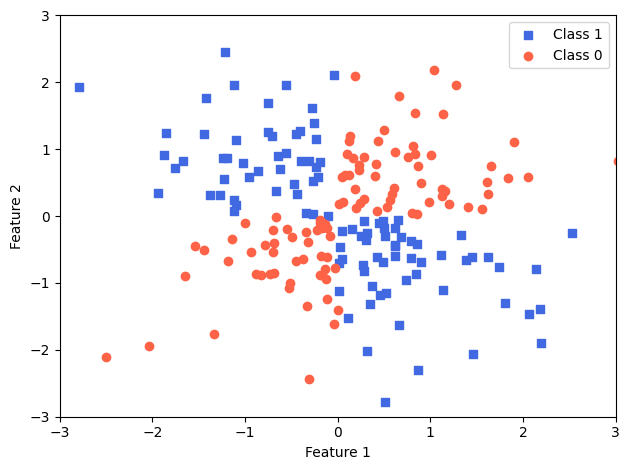

In [11]:
np.random.seed(1)
# generate a 2d array from standard normal distribution
X_xor = np.random.randn(200, 2)

# y_xor = X_xor[:,0] ^ X_xor[:,1]
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

# y_xor = 1 if y_xor == True else 0
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0], 
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

# plot those (x>0 && y>0) || (x<0 && y<0) 
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

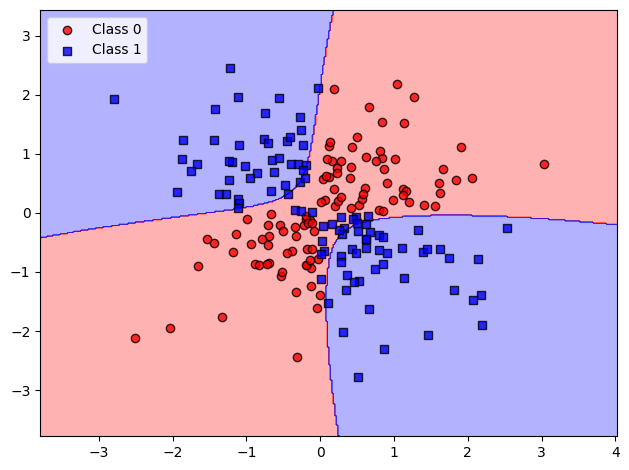

In [12]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

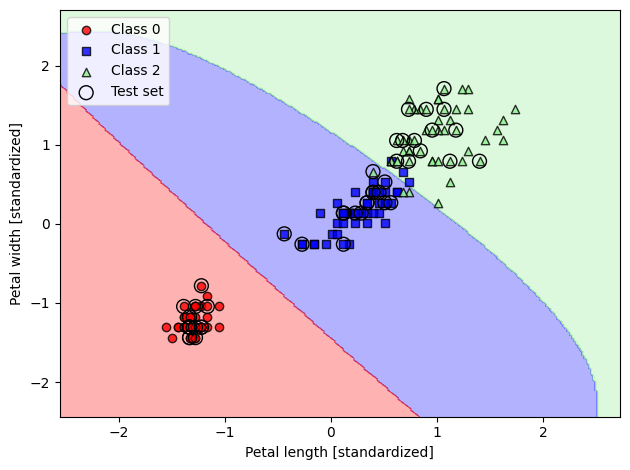

In [13]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

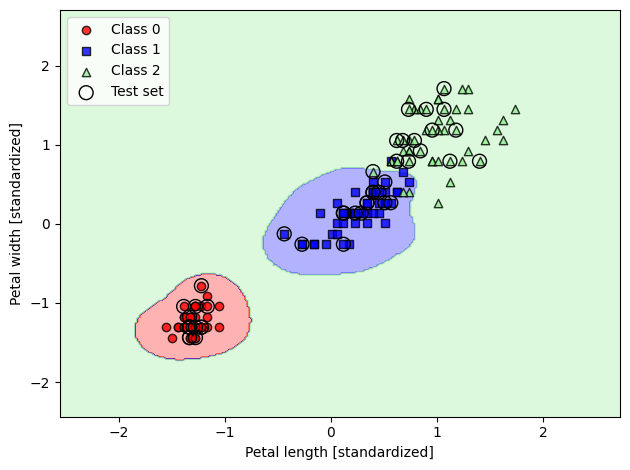

In [14]:
svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decision Tree

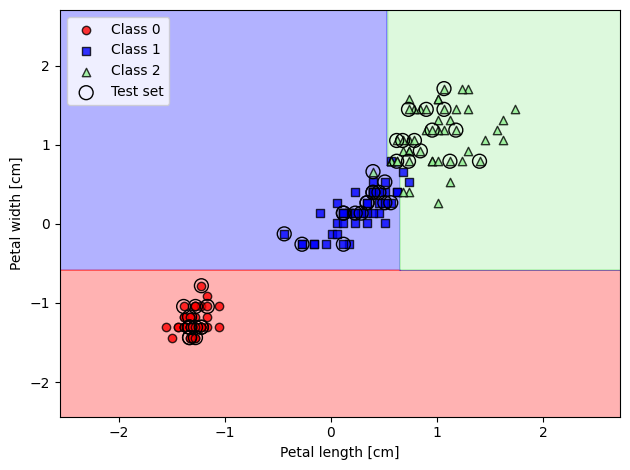

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

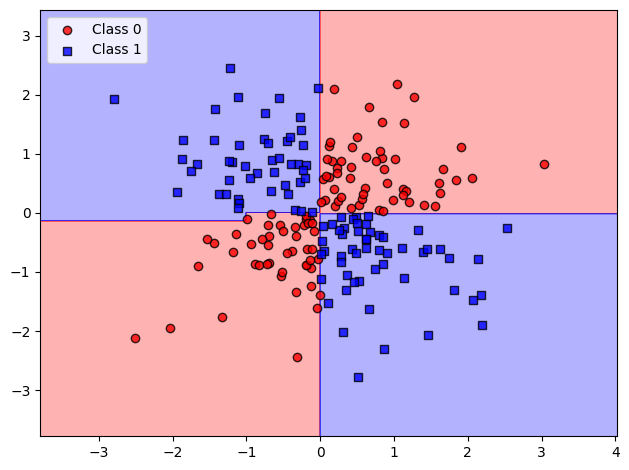

In [16]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=tree_model)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## More decision tree example

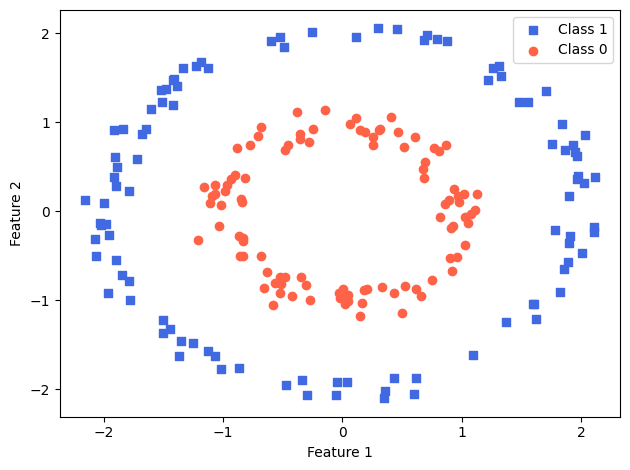

In [17]:
n_samples = 200
radius_inner = 1.0
radius_outer = 2.0
noise = 0.1

theta_inner = 2 * np.pi * np.random.rand(n_samples // 2)
X_inner = np.c_[radius_inner * np.cos(theta_inner), radius_inner * np.sin(theta_inner)]
X_inner += noise * np.random.randn(*X_inner.shape)
y_inner = np.zeros(n_samples // 2)

theta_outer = 2 * np.pi * np.random.rand(n_samples // 2)
X_outer = np.c_[radius_outer * np.cos(theta_outer), radius_outer * np.sin(theta_outer)]
X_outer += noise * np.random.randn(*X_outer.shape)
y_outer = np.ones(n_samples // 2)

X_circle = np.vstack([X_inner, X_outer])
y_circle = np.hstack([y_inner, y_outer])

plt.scatter(X_circle[y_circle == 1, 0], 
            X_circle[y_circle == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

# plot those (x>0 && y>0) || (x<0 && y<0) 
plt.scatter(X_circle[y_circle == 0, 0],
            X_circle[y_circle == 0, 1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


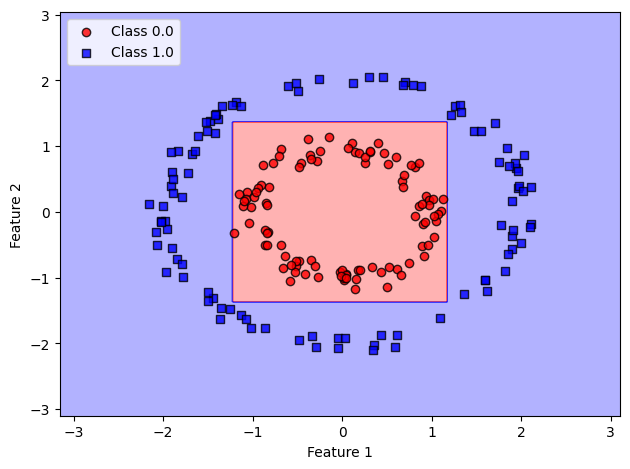

In [18]:
tree_model.fit(X_circle, y_circle)

plot_decision_regions(X_circle, y_circle, classifier=tree_model)
plt.legend(loc='upper left')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

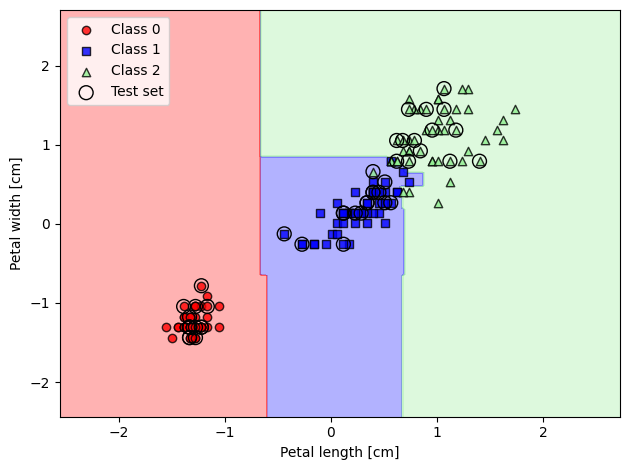

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=8)
forest.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## KNN

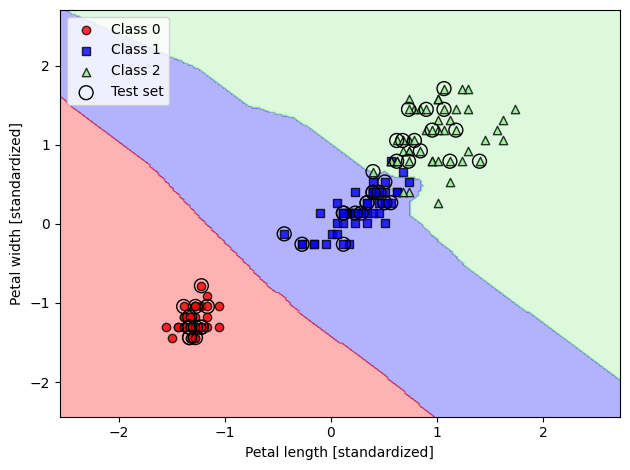

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Hands on KNN classifier

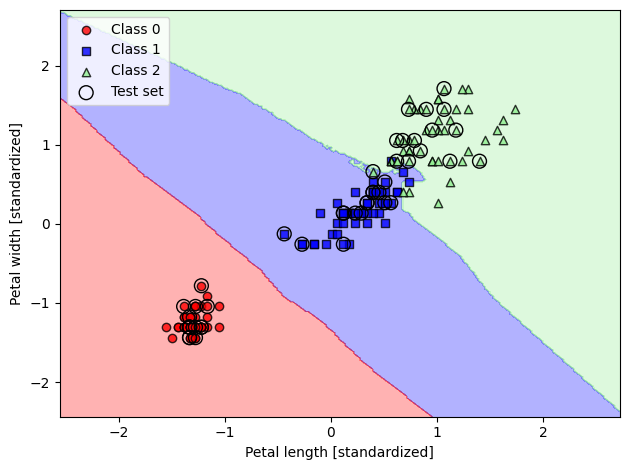

In [21]:
from dlfc.neighbour import KNNClassifier
myknn = KNNClassifier(k=3)
myknn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=myknn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()